# Assignment on Ising Model

## 1) Calculating the energy for a 3x3 grid using the definition

In [1]:
# downloading all the packages
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

In [2]:
# Downloading the packages
from itertools import product
import random
import math
from random import randrange

In [3]:
# Taking a 3x3 matrix and finiding all the configurations
N = 3
three_x_three = product([-1,1], repeat= N*N)
three_x_three = np.reshape(list(three_x_three), (-1,N,N))
print(three_x_three)

[[[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1 -1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1 -1  1]]

 [[-1 -1 -1]
  [-1 -1 -1]
  [-1  1 -1]]

 ...

 [[ 1  1  1]
  [ 1  1  1]
  [ 1 -1  1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1 -1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]]


In [4]:
# In this I have calculated the energirs of all the configurations using a nested for loop!
energy = []
for i in range(0, len(three_x_three)):
    m = three_x_three[i];
    spin = 0;
    for j in range(0,N):
        for k in range(0, N-1):
            prod1 = m[j,k]*m[j,k+1];
            spin += prod1;
    for k in range(0,N):
        for j in range(0,N-1):
            prod2 = m[j,k]*m[j+1,k];
            spin += prod2;
    spin = spin*(-1);
    energy.append(spin);
print(energy)

[-12, -8, -6, -6, -8, -4, -6, -6, -6, -6, 0, -4, -2, -2, 0, -4, -4, 0, -2, -2, 0, 4, -2, -2, -2, -2, 0, -4, 2, 2, 0, -4, -6, -2, 0, 0, -6, -2, -4, -4, 0, 0, 6, 2, 0, 0, 2, -2, -2, 2, 0, 0, -2, 2, -4, -4, 0, 0, 2, -2, 0, 0, -2, -6, -8, -4, -2, -2, -4, 0, -2, -2, -6, -6, 0, -4, -2, -2, 0, -4, 0, 4, 2, 2, 4, 8, 2, 2, -2, -2, 0, -4, 2, 2, 0, -4, -2, 2, 4, 4, -2, 2, 0, 0, 0, 0, 6, 2, 0, 0, 2, -2, 2, 6, 4, 4, 2, 6, 0, 0, 0, 0, 2, -2, 0, 0, -2, -6, -6, -2, 0, 0, -2, 2, 0, 0, 0, 0, 6, 2, 4, 4, 6, 2, -2, 2, 0, 0, 2, 6, 0, 0, 0, 0, 2, -2, 4, 4, 2, -2, 0, 4, 6, 6, 0, 4, 2, 2, 6, 6, 12, 8, 6, 6, 8, 4, 0, 4, 2, 2, 0, 4, -2, -2, 2, 2, 4, 0, 2, 2, 0, -4, -6, -2, 0, 0, -2, 2, 0, 0, -4, -4, 2, -2, 0, 0, 2, -2, -2, 2, 0, 0, 2, 6, 0, 0, -4, -4, -2, -6, 0, 0, -2, -6, 0, 4, 6, 6, 0, 4, 2, 2, 2, 2, 8, 4, 2, 2, 4, 0, 0, 4, 2, 2, 0, 4, -2, -2, -2, -2, 0, -4, -2, -2, -4, -8, -8, -4, -2, -2, -4, 0, -2, -2, -2, -2, 4, 0, 2, 2, 4, 0, 0, 4, 2, 2, 4, 8, 2, 2, 2, 2, 4, 0, 6, 6, 4, 0, -6, -2, 0, 0, -6, -2, -4, -4, 0,

In [5]:
# Calculating mean
np.mean(energy)

0.0

In [6]:
# Calculating Variance
np.std(energy)*np.std(energy)

11.999999999999998

In [7]:
np.unique(energy)

array([-12,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  12])

## 2) Coding of the Metropolis Algorithm

In [8]:
# This is the numbert of grids. We can change it dependijg on the question
N= 3

#### The below step is the initial configuration I have taken. It shouldn't matter much. For now I have assumes 50% of +ve and -ve spins

In [9]:
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.5] = 1
lattice_n[init_random<0.5] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.5] = 1
lattice_p[init_random<0.5] = -1

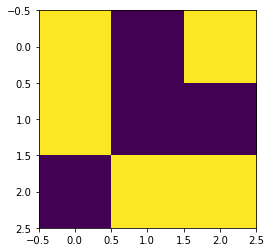

In [10]:
plt.imshow(lattice_n)

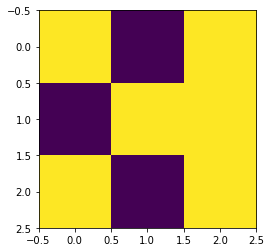

In [11]:
plt.imshow(lattice_p)

### This is the most important part of the entire algorithm! After a whole day of research I have figured that using concolution is the perfect way to fing energies in Metropolis algorithm. Hence I have created a used defined function and find it's energy!

In [12]:
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()

In [13]:
# You can check this by changing initial grids and configurations. It is very accurate!!!
get_energy(lattice_n)

8.0

### The main part of the assignment. "The Metropolis Algorithm"

In [14]:
def metropolis(spin_arr, times, Beta, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in np.arange(1000,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-Beta*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
    return net_spins, net_energy

## NOTE: The difference between the burnout and no burnout period is the limit. Hence here you can see only one.

## 3) Algorithm for a 3x3 grid @ different beta values

In [15]:
# Burn out 1000, steps 10000
spins, energies = metropolis(lattice_p, 10000, -1.5, get_energy(lattice_p))

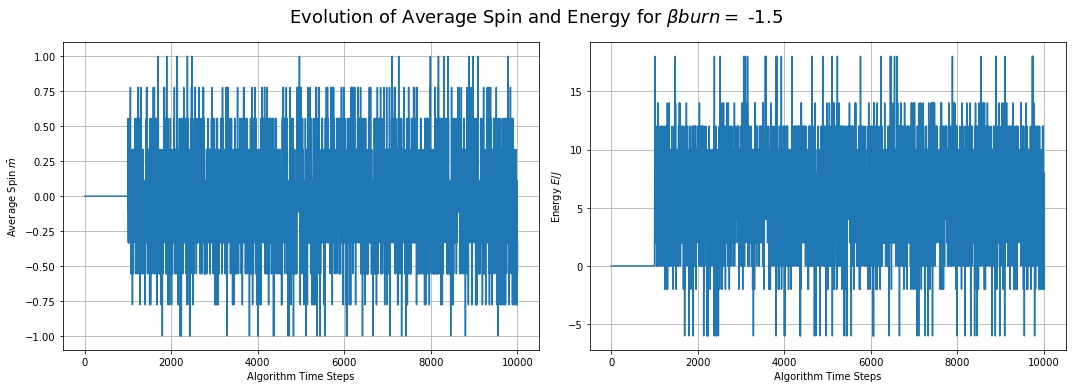

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ -1.5',y = 1.07, size =18)
plt.show()

In [17]:
np.mean(energies)

5.365936593659366

In [18]:
np.std(energies)*np.std(energies)

14.286632463626399

In [19]:
spins, energies = metropolis(lattice_p, 10000, 0, get_energy(lattice_p))

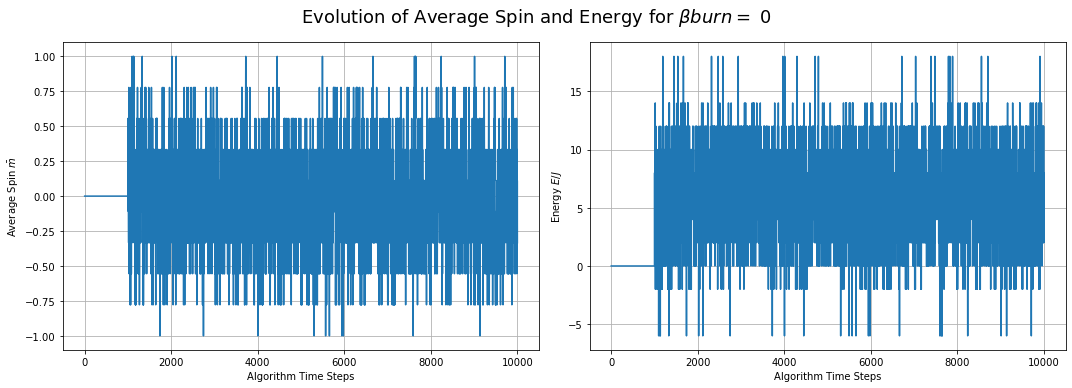

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ 0',y = 1.07, size =18)
plt.show()

In [21]:
np.mean(energies)

5.39033903390339

In [22]:
np.std(energies)*np.std(energies)

13.432893964463952

In [23]:
critical_b = np.log(1.41421356)/(2*2.71828)

In [24]:
spins, energies = metropolis(lattice_p, 10000, critical_b , get_energy(lattice_p))

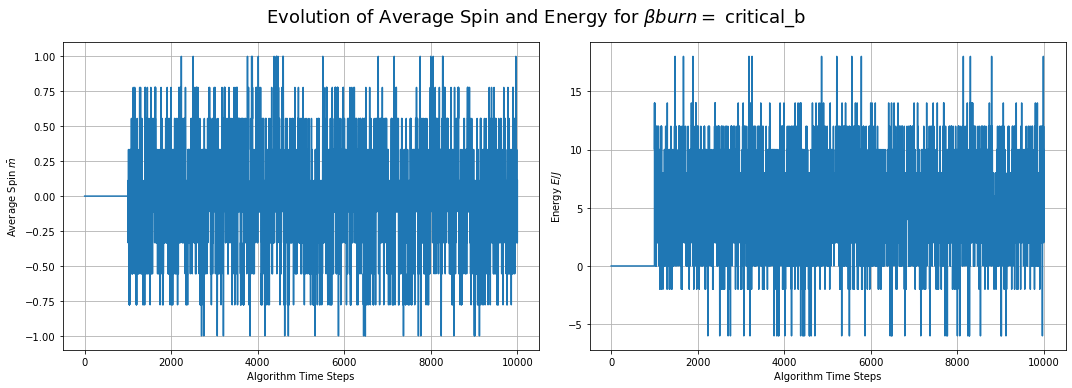

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ critical_b',y = 1.07, size =18)
plt.show()

In [26]:
np.mean(energies)

4.732673267326732

In [27]:
np.std(energies)*np.std(energies)

13.42178574293073

In [28]:
spins, energies = metropolis(lattice_p, 10000, 0.75 , get_energy(lattice_p))

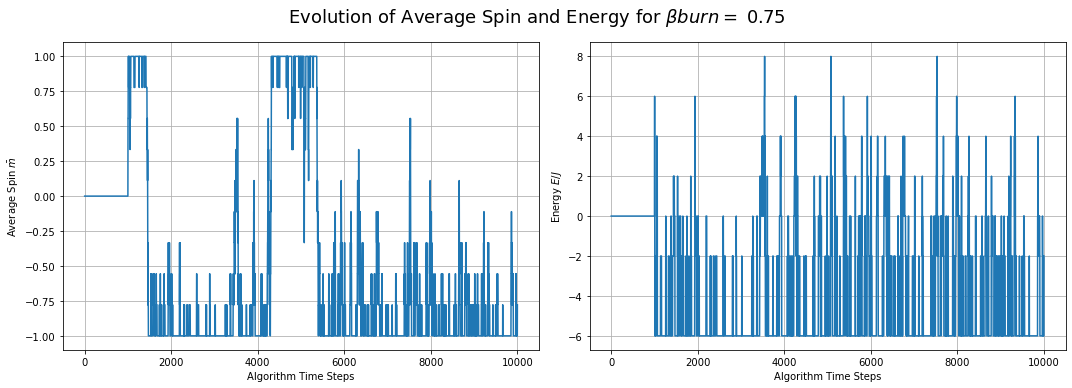

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ 0.75',y = 1.07, size =18)
plt.show()

In [30]:
np.mean(energies)

-3.9685968596859684

In [31]:
np.std(energies)*np.std(energies)

8.357049646358776

## 4) Repeating the process for 100x100 grid

In [32]:
N = 100

In [33]:
init_random = np.random.random((N,N))
lattice_n = np.zeros((N, N))
lattice_n[init_random>=0.5] = 1
lattice_n[init_random<0.5] = -1

init_random = np.random.random((N,N))
lattice_p = np.zeros((N, N))
lattice_p[init_random>=0.5] = 1
lattice_p[init_random<0.5] = -1

In [34]:
# This is the effective way of solving energy for Metropolis Algorithm. Hence I have used this user defined function.
## I have done a lot of research to arrive at this fucntion. Almost a whole day research!!!!
def get_energy(lattice):
    # applies the nearest neighbours summation
    kern = generate_binary_structure(2, 1) 
    kern[1][1] = False
    arr = -lattice * convolve(lattice, kern, mode='constant', cval=0)
    return arr.sum()

In [35]:
# Changed the burning time and steps
def metropolis(spin_arr, times, Beta, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in np.arange(50000,times-1):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #initial spin
        spin_f = spin_i*-1 #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
        
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-Beta*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
    return net_spins, net_energy

In [36]:
spins, energies = metropolis(lattice_p, 500000, -1.5 , get_energy(lattice_p))

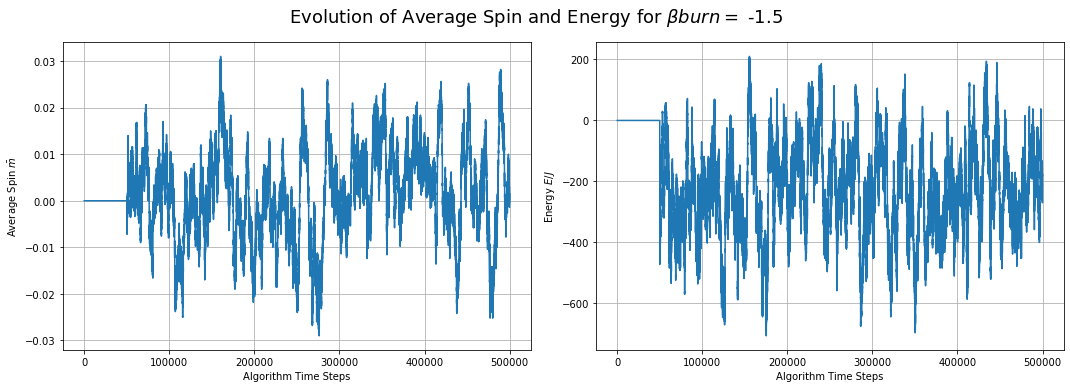

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ -1.5',y = 1.07, size =18)
plt.show()

In [38]:
np.mean(energies)

-208.21938043876088

In [39]:
np.std(energies)*np.std(energies)

25057.355051029444

In [40]:
spins, energies = metropolis(lattice_p, 500000, 0 , get_energy(lattice_p))

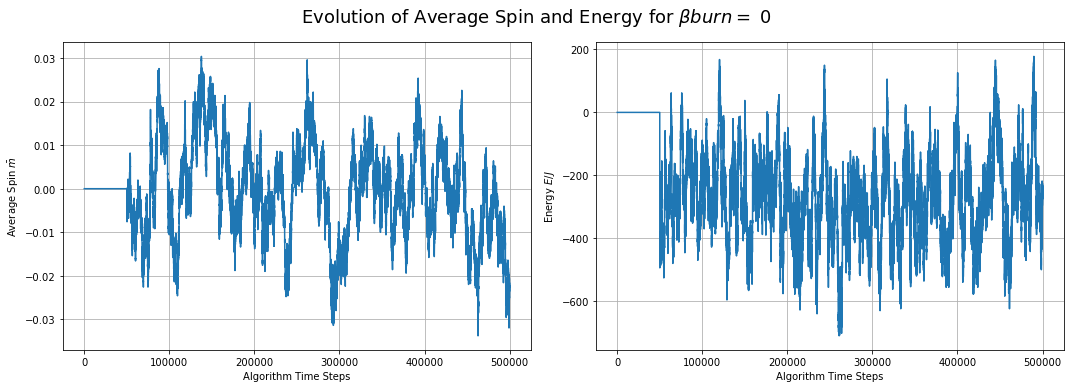

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ 0',y = 1.07, size =18)
plt.show()

In [42]:
np.mean(energies)

-250.3509247018494

In [43]:
np.std(energies)*np.std(energies)

23605.43658297309

In [44]:
spins, energies = metropolis(lattice_p, 500000, critical_b , get_energy(lattice_p))

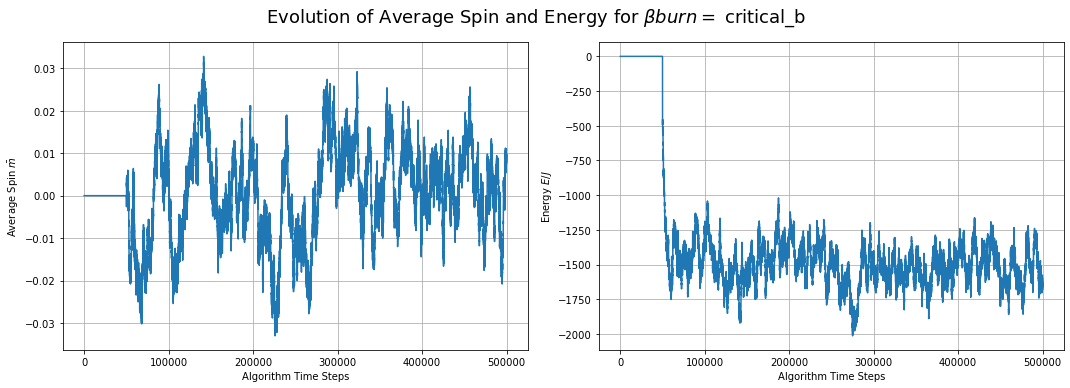

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ critical_b',y = 1.07, size =18)
plt.show()

In [46]:
np.mean(energies)

-1349.8563477126954

In [47]:
np.std(energies)*np.std(energies)

223655.8387957394

In [48]:
spins, energies = metropolis(lattice_p, 500000, 0.75 , get_energy(lattice_p))

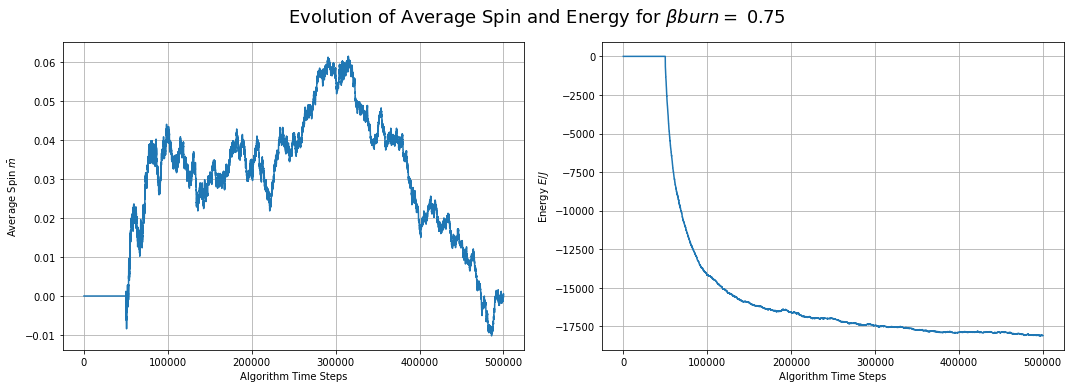

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Average Spin $\bar{m}$')
ax.grid()
ax = axes[1]
ax.plot(energies)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'Evolution of Average Spin and Energy for $\beta burn =$ 0.75',y = 1.07, size =18)
plt.show()

In [50]:
np.mean(energies)

-14733.3665507331

In [51]:
np.std(energies)*np.std(energies)

30060533.815170456

## 5) For this last question only the proposed function changes. Let's see the code

In [ ]:
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times)
    net_energy = np.zeros(times)
    x = product([-1,1], repeat= N*N)
    x = np.reshape(list(x), (-1,N,N))
    E_p = [] 
    for i in range(0, (2**(N*N))):
        p = x[i];
        sp = 0;
        for j in range(0,N):
            for k in range(0, N-1):
                prod = p[j,k]*p[j,k+1];
                sp += prod;
        for k in range(0,N):
            for j in range(0,N-1):
                prod1 = p[j,k]*p[j+1,k];
                sp += prod1;
        sp = sp*(-1);
        E_p.append(sp);
    for t in np.arange(0,times):
        # 2. pick random point on array and flip spin
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)                
        spin_i = spin_arr[x,y] #initial spin
        #proposed spin flip
        
        # compute change in energy
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
        
        E_f = np.random.choice(E_p)
        # 3 / 4. change state with designated probabilities
        dE = E_f-E_i
        if (dE>0)*(np.random.random() < np.exp(-BJ*dE)):
            energy += dE
        elif dE<=0:
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
    return net_spins, net_energy